In [1]:
import sqlalchemy
import mysql.connector
import sqlite3
import pandas as pd
from pandas import DataFrame, Series
import os

#
# use environmental variables for the SQL query
#

db_user = os.environ.get('dbUser')
db_password = os.environ.get('dbPass')

# creating connection
conn = mysql.connector.connect(
  host="3.135.162.69",
  user=db_user,
  password=db_password
)

mycursor = conn.cursor()
mycursor.execute("USE trweather;")
pop1 = ("select * from trw order by timeGroup DESC LIMIT 30;")
mycursor.execute(pop1)
allDays = mycursor.fetchall()

colNames = ['Index', 'Rain', 'HiTemp', 'LowTemp', 'Year', 'Month', 'Day', 'timeGroup']
df = pd.DataFrame(allDays, columns = colNames)
df = df.iloc[::-1]
newDate = df['Month'] + df['Day']

In [2]:
import pandas as pd
from pandas import DataFrame, Series

df = df.drop(df.columns[[0, 2, 3]], axis = 1)       
path1 = '/Users/jameshayes/'
path2 = '/var/www/html/000/'

df.to_html(path2 + 'Rain30' + '.html', index = False, justify = 'center')          

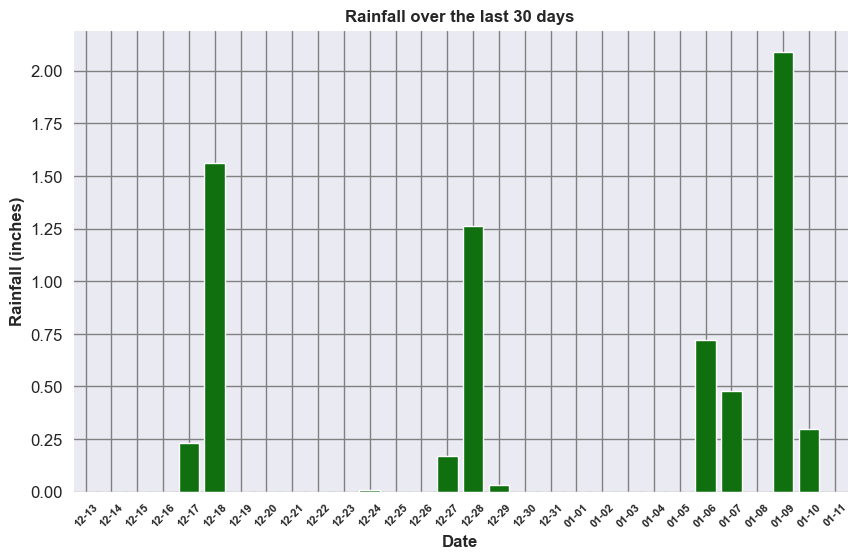

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

path1 = '/Users/jameshayes/'
path2 = '/var/www/html/000/'

year = (df['Year']).astype(str)
month = (df['Month']).astype(str)
day = (df['Day']).astype(str)

df['newDate'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df['new_date'] = df['newDate'].dt.date
df['new_date'].astype('str')
df['new_date'] = df['new_date'].apply(str).str.replace('2024-', '')

sns.set_style('darkgrid')

plt.figure(figsize= (10,6))
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 8, rotation = 45, fontweight = 'bold')
plt.title('Rainfall over the last 30 days', fontsize = 12, fontweight = 'bold')
plt.grid(axis = "y", linewidth = 1.0, color = 'gray')
plt.grid(axis = "x", linewidth = 1.0, color = 'gray')
sns.barplot(data = df, x = 'new_date' , y = 'Rain', color = 'g', width=0.8)
plt.xlabel('Date',fontsize = 12, fontweight = 'bold')
plt.ylabel('Rainfall (inches)', fontsize = 12, fontweight = 'bold')
plt.grid(True)
plt.savefig(f'{path2}Rain30.png')  